In [1]:
from simulation.model import PathFindingModel
import mesa
import analytics.ranking_measures as measures
import pandas as pd

In [16]:
def group_summary(df, measure_func):
    group_statistics = {
        'zone':df['goal_zones'].iloc[0],
        'alg':df['path_planning_alg'].iloc[0],
        'goal_pop':df['intention_num'].iloc[0],
        'seed':df['seed'].iloc[0],
        'obstacle_used':df['obstacle_used'].iloc[0],
        'segments':df['segment_num'].max(),
        'segmentation':measure_func(df['Segment_ranking'],ground_truth_position=df['true_intention'].iloc[0]),
        'masters':measure_func(df['Masters_ranking'],ground_truth_position=df['true_intention'].iloc[0]),
        'mirroring':measure_func(df['Mirroring_ranking'],ground_truth_position=df['true_intention'].iloc[0]),}
        # 'segmentation_probs':df['Segment_probs'].iloc[0],
        # 'masters_probs':df['Masters_probs'].iloc[0],
        # 'mirroring_probs':df['Mirroring_probs'].iloc[0]}
    return pd.Series(group_statistics)

def df_transform(raw_df, measure_func):
    run_statistics = raw_df.groupby('RunId').apply(lambda x: group_summary(x, measure_func))
    # run_statistics.set_index(['zone','goal_pop','seed','alg','obstacle_used'], inplace=True)
    return run_statistics


## Experiment 1: Justification of segmentation

In [46]:
params = {"width":20,"height":20,"obs_num":40,"goal_zones":['2,2,2,2','2,0,0,0','2,2,2,2,2,2,2,2'],"seed":range(0,1000),"path_planning_alg":[0,1,2],"intention_profile":1}
results = mesa.batch_run(
    PathFindingModel,
    parameters = params,
    iterations = 1,
    max_steps = 500,
    number_processes = None,
    data_collection_period = 1,
    display_progress=True,
)
results_df_e1 = pd.DataFrame(results)
results_df_e1.to_csv('results/e4.csv')

100%|██████████| 9000/9000 [12:55:04<00:00,  5.17s/it]    


In [10]:
results_df_e1

,RunId,iteration,Step,width,height,obs_num,goal_zones,seed,path_planning_alg,intention_profile,true_intention,intention_num,obstacle_used,segment_num,Segment_ranking,FastSegment_ranking,Masters_ranking,Mirroring_ranking
0,7,0,0,20,20,40,"2,2,2,2",2,1,1,3,8,True,0,"[0, 1, 2, 3, 4, 5, 6, 7]","[0, 1, 2, 3, 4, 5, 6, 7]","[0, 1, 2, 3, 4, 5, 6, 7]","[0, 1, 2, 3, 4, 5, 6, 7]"
1,7,0,1,20,20,40,"2,2,2,2",2,1,1,3,8,True,0,"[0, 1, 2, 3, 4, 5, 6, 7]","[0, 1, 2, 3, 4, 5, 6, 7]","[0, 1, 2, 3, 4, 5, 6, 7]","[0, 1, 2, 3, 4, 5, 6, 7]"
2,7,0,2,20,20,40,"2,2,2,2",2,1,1,3,8,True,0,"[0, 1, 2, 3, 4, 5, 6, 7]","[0, 1, 2, 3, 4, 5, 6, 7]","[0, 1, 2, 3, 4, 5, 6, 7]","[0, 1, 2, 3, 4, 5, 6, 7]"
3,7,0,3,20,20,40,"2,2,2,2",2,1,1,3,8,True,1,"[1, 2, 7, 3, 4, 6, 5, 0]","[1, 2, 7, 3, 4, 6, 5, 0]","[0, 1, 7, 2, 3, 6, 4, 5]","[0, 1, 7, 2, 3, 6, 4, 5]"
4,7,0,4,20,20,40,"2,2,2,2",2,1,1,3,8,True,2,"[0, 4, 7, 1, 5, 6, 2, 3]","[0, 4, 7, 1, 5, 6, 2, 3]","[0, 1, 7, 2, 3, 6, 4, 5]","[0, 4, 7, 1, 5, 6, 2, 3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88638,1797,0,164,20,20,40,"0,0,0,0",299,0,1,3,8,True,12,"[1, 6, 7, 0, 4, 5, 2, 3]","[0, 6, 7, 1, 4, 5, 2, 3]","[1, 6, 7, 0, 4, 5, 2, 3]","[1, 6, 7, 0, 4, 5, 2, 3]"
88639,1797,0,165,20,20,40,"0,0,0,0",299,0,1,3,8,True,13,"[1, 3, 2, 0, 6, 7, 4, 5]","[1, 3, 2, 0, 6, 7, 4, 5]","[1, 6, 7, 0, 4, 5, 2, 3]","[1, 6, 7, 0, 4, 5, 2, 3]"
88640,1797,0,166,20,20,40,"0,0,0,0",299,0,1,3,8,True,13,"[1, 3, 2, 0, 6, 7, 4, 5]","[0, 3, 2, 1, 6, 7, 4, 5]","[1, 6, 7, 0, 4, 5, 2, 3]","[1, 6, 7, 0, 4, 5, 2, 3]"
88641,1797,0,167,20,20,40,"0,0,0,0",299,0,1,3,8,True,13,"[1, 3, 2, 0, 6, 7, 4, 5]","[0, 3, 2, 1, 6, 7, 4, 5]","[1, 6, 7, 0, 4, 5, 2, 3]","[1, 6, 7, 0, 4, 5, 2, 3]"


In [47]:
e1_final_correctness = df_transform(results_df_e1, measures.final_correctness)
e1_fc_long = pd.melt(e1_final_correctness.reset_index(), id_vars=['zone','alg','goal_pop','seed','obstacle_used','segments'], value_vars=['segmentation','masters','mirroring'], var_name='measure', value_name='Final Correctness')
e1_fc_long.set_index(['zone','goal_pop','seed','alg','obstacle_used','segments','measure'], inplace=True)
e1_gc = df_transform(results_df_e1, measures.correctness)
e1_gc_long = pd.melt(e1_gc.reset_index(), id_vars=['zone','alg','goal_pop','seed','obstacle_used','segments'], value_vars=['segmentation','masters','mirroring'], var_name='measure', value_name='Overall Correctness')
e1_gc_long.set_index(['zone','goal_pop','seed','alg','obstacle_used','segments','measure'], inplace=True)
e1_cc = df_transform(results_df_e1, measures.last_change)
e1_cc_long = pd.melt(e1_cc.reset_index(), id_vars=['zone','alg','goal_pop','seed','obstacle_used','segments'], value_vars=['segmentation','masters','mirroring'], var_name='measure', value_name='Convergence Speed')
e1_cc_long.set_index(['zone','goal_pop','seed','alg','obstacle_used','segments','measure'], inplace=True)
e1_stability = df_transform(results_df_e1, measures.stability)
e1_stability_long = pd.melt(e1_stability.reset_index(), id_vars=['zone','alg','goal_pop','seed','obstacle_used','segments'], value_vars=['segmentation','masters','mirroring'], var_name='measure', value_name='Stability')
e1_stability_long.set_index(['zone','goal_pop','seed','alg','obstacle_used','segments','measure'], inplace=True)
e1 = pd.concat([e1_fc_long, e1_gc_long, e1_cc_long, e1_stability_long], axis=1)
e1.reset_index(names=['zone','goal_pop','seed','alg','obstacle_used','segments','measure'], inplace=True)
e1_long = pd.melt(e1, id_vars=['zone','goal_pop','seed','alg','obstacle_used','segments','measure'], value_vars=['Final Correctness','Overall Correctness','Convergence Speed','Stability'], var_name='metric', value_name='value')

In [18]:
e1_long

,zone,goal_pop,seed,alg,obstacle_used,segments,measure,metric,value
0,"2,2,2,2",8,0,0,True,9,segmentation,Final Correctness,1.000000
1,"2,2,2,2",8,0,1,True,8,segmentation,Final Correctness,1.000000
2,"2,2,2,2",8,0,2,True,10,segmentation,Final Correctness,1.000000
3,"2,2,2,2",8,1,0,True,17,segmentation,Final Correctness,0.000000
4,"2,2,2,2",8,1,1,True,9,segmentation,Final Correctness,0.000000
...,...,...,...,...,...,...,...,...,...
21595,"0,0,0,0",8,298,1,False,9,mirroring,Stability,0.937500
21596,"0,0,0,0",8,298,2,False,4,mirroring,Stability,1.000000
21597,"0,0,0,0",8,299,0,True,13,mirroring,Stability,0.982143
21598,"0,0,0,0",8,299,1,True,6,mirroring,Stability,0.941176


In [67]:
tmp = e1_long.replace({'obstacle_used':{False:'No Obstacle',True:'Obstacle Used'}})

In [68]:
tmp = tmp[tmp['alg'].isin([1,2])]

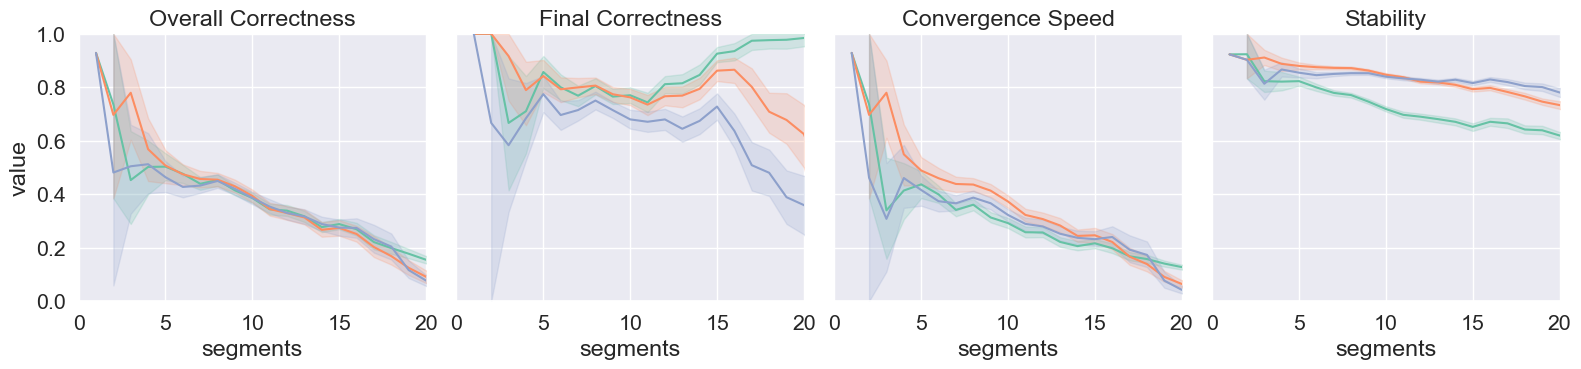

In [72]:
import seaborn as sns
sns.set(font='Arial',font_scale=1.4)
g = sns.FacetGrid(tmp, col="metric", col_order=['Overall Correctness','Final Correctness','Convergence Speed','Stability'], 
                  margin_titles=True, 
                  palette='Set2',
                  hue='measure',
                  hue_order = ['segmentation','masters','mirroring'],
                  height=4
                  )
g.set_titles(row_template="{row_name}",col_template="{col_name}")
g.map(sns.lineplot, 'segments', 'value')
g.set(ylim=(0,1),xlim=(0,20))

In [73]:
g.savefig('results/e4.pdf',format='pdf')

#### General correctness

[(0.0, 20.0)]

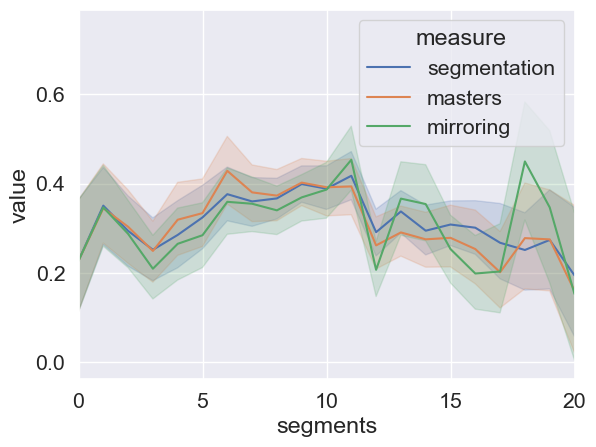

In [28]:
import seaborn as sns
e1_gc = e1_long[e1_long['metric']=='Overall Correctness']
g = sns.lineplot(data=e1_gc, x='segments', y='value', hue='measure')
g.set(xlim=(0,20))

#### Final correctness

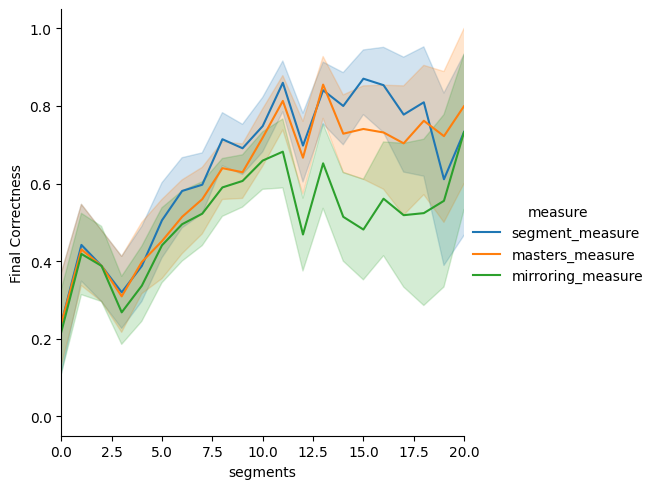

In [12]:
e1_fc = df_transform(results_df_e1, measures.final_correctness)
e1_fc_long = pd.melt(e1_fc.reset_index(), id_vars=['zone','alg','goal_pop','seed','obstacle_used','segments'], value_vars=['segment_measure','masters_measure','mirroring_measure'], var_name='measure', value_name='Final Correctness')
g = sns.relplot(data=e1_fc_long, x='segments', y='Final Correctness', hue='measure', kind='line')
g.set(xlim=(0,20))

#### Convergence correctness

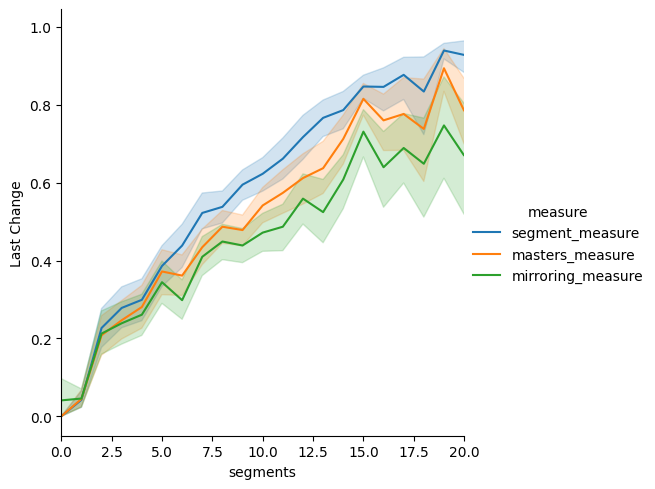

In [13]:
e1_cc = df_transform(results_df_e1, measures.last_change)
e1_cc_long = pd.melt(e1_cc.reset_index(), id_vars=['zone','alg','goal_pop','seed','obstacle_used','segments'], value_vars=['segment_measure','masters_measure','mirroring_measure'], var_name='measure', value_name='Last Change')
g = sns.relplot(data=e1_cc_long, x='segments', y='Last Change', hue='measure', kind='line')
g.set(xlim=(0,20))

#### Stability

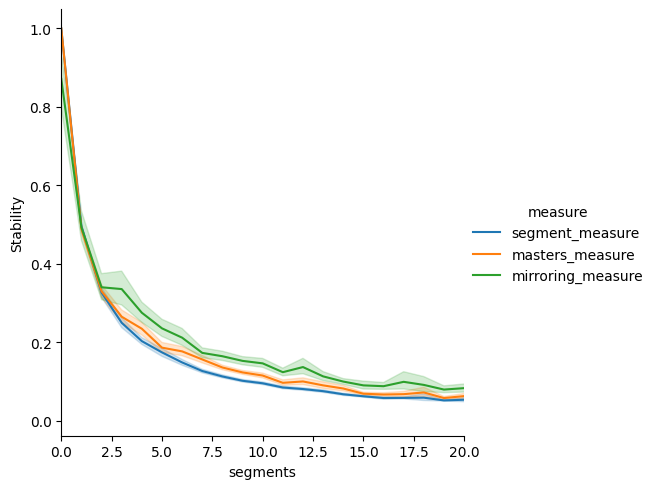

In [14]:
e1_stability = df_transform(results_df_e1, measures.stability)
e1_stability_long = pd.melt(e1_stability.reset_index(), id_vars=['zone','alg','goal_pop','seed','obstacle_used','segments'], value_vars=['segment_measure','masters_measure','mirroring_measure'], var_name='measure', value_name='Stability')
g = sns.relplot(data=e1_stability_long, x='segments', y='Stability', hue='measure', kind='line')
g.set(xlim=(0,20))